# **pandas_datareader for live data fetching**

# **STOCK MARKET CLUSTERING**

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters using the K-means algorithm.

Note that this is an unsuppervised machine learning problem and will use an unsuppervised machine learning technique with the help of the K-means algorithm.

NB: "pandas_datareader" extract data from variouse internet sources into a Dataframe. Curently the following sources are supported


*   Yahoo! Finance
*   Google Finance
*  St. Louis FED (FRED)
* Kenneth French's data library
* World Bank
* Google Analytics



In [165]:
!pip install pandas_datareader

In [166]:
!pip install plotly

In [167]:
from pandas_datareader import data  #https://bit.ly/2SEL507
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.simplefilter("ignore")

In [168]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [169]:
!pip install yfinance

In [170]:
import yfinance as yfin
yfin.pdr_override()


data_source = 'yahoo'  # Source of data is yahoo finance.
start_date = '2015-04-25'
end_date = '2020-04-25'
df = data.get_data_yahoo(list(companies_dict.values()), start_date, end_date) #https://bit.ly/2SEL507

[*********************100%***********************]  24 of 24 completed


In [171]:
df.head()

Adj Close                                                          \
                 AAPL       AMZN        AXP          BA        BAC        CVX   
Date                                                                            
2015-04-27  29.968859  21.927999  69.147400  130.068771  13.399406  78.365059   
2015-04-28  29.496685  21.465500  69.147400  129.813553  13.476912  79.379471   
2015-04-29  29.062906  21.468500  68.852928  128.616669  13.761090  79.815247   
2015-04-30  28.274427  21.089001  69.111702  126.143806  13.718034  79.336601   
2015-05-01  29.132936  21.143499  69.316940  127.314278  13.873037  77.893593   

                                                          ...   Volume  \
                    F          GE        HMC         IBM  ...       MA   
Date                                                      ...            
2015-04-27  11.325676  180.974380  36.220001  116.142967  ...  4854300   
2015-04-28  11.439648  182.590271  33.759998  118.313034  ...  4786300   
2015-04-29  11.518740  182.388245  33.480000  118.639587  ...  9364700   
2015-04-30  11.360556  182.320877  33.529999  116.523903  ...  7470700   
2015-05-01  11.367745  183.869446  34.220001  118.142952  ...  4663100   

                                                                           \
                MCD      MSFT      NOC      PEP      TM      TXN      VLO   
Date                                                                        
2015-04-27  7282700  59248200  1231500  5348500  273000  8397300  8056400   
2015-04-28  4357400  60730800  1132300  5065900  421900  6729300  7905400   
2015-04-29  5697200  47804600  1397300  4963600  282900  5276300  6002600   
2015-04-30  8300300  64725500  2465400  6714400  246800  6756900  8067500   
2015-05-01  6280300  38937300  1136500  4622300  247100  5726700  6905700   

                               
                WBA       XOM  
Date                           
2015-04-27  4110200  10534600  
2015-04-28  2366500   9633800  
2015-04-29  3224500  12534100  
2015-04-30  4750200  13947700  
2015-05-01  2282200  12257100  

[5 rows x 144 columns]

In [172]:
df.isna().sum()

Adj Close  AAPL    0
           AMZN    0
           AXP     0
           BA      0
           BAC     0
                  ..
Volume     TM      0
           TXN     0
           VLO     0
           WBA     0
           XOM     0
Length: 144, dtype: int64

In [173]:
stock_open = np.array(df['Open']).T  # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T  # stock_close is numpy array of transpose of df['Close']

In [174]:
#‘movement’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [175]:
sum_of_movement = np.sum(movements, 1)  #sum of differences of closing and opening prices of all days.

In [176]:
for i in range(len(companies_dict)):
    print('company:{}, Change:{}'.format(df['High'].columns[i], sum_of_movement[i]))

company:AAPL, Change:46.02497673034668
company:AMZN, Change:-8.328699111938477
company:AXP, Change:-7.75982666015625
company:BA, Change:-73.14045715332031
company:BAC, Change:2.4299745559692383
company:CVX, Change:-21.669967651367188
company:F, Change:-14.990012645721436
company:GE, Change:-58.61511993408203
company:HMC, Change:-21.420005798339844
company:IBM, Change:-10.80291748046875
company:INTC, Change:42.489999771118164
company:JNJ, Change:46.10985565185547
company:KO, Change:13.67996597290039
company:LMT, Change:47.33030700683594
company:MA, Change:69.43009185791016
company:MCD, Change:49.1201171875
company:MSFT, Change:29.959903717041016
company:NOC, Change:79.23982238769531
company:PEP, Change:53.52012634277344
company:TM, Change:-51.96003723144531
company:TXN, Change:46.78992462158203
company:VLO, Change:-30.779918670654297
company:WBA, Change:-36.30998992919922
company:XOM, Change:-23.520084381103516


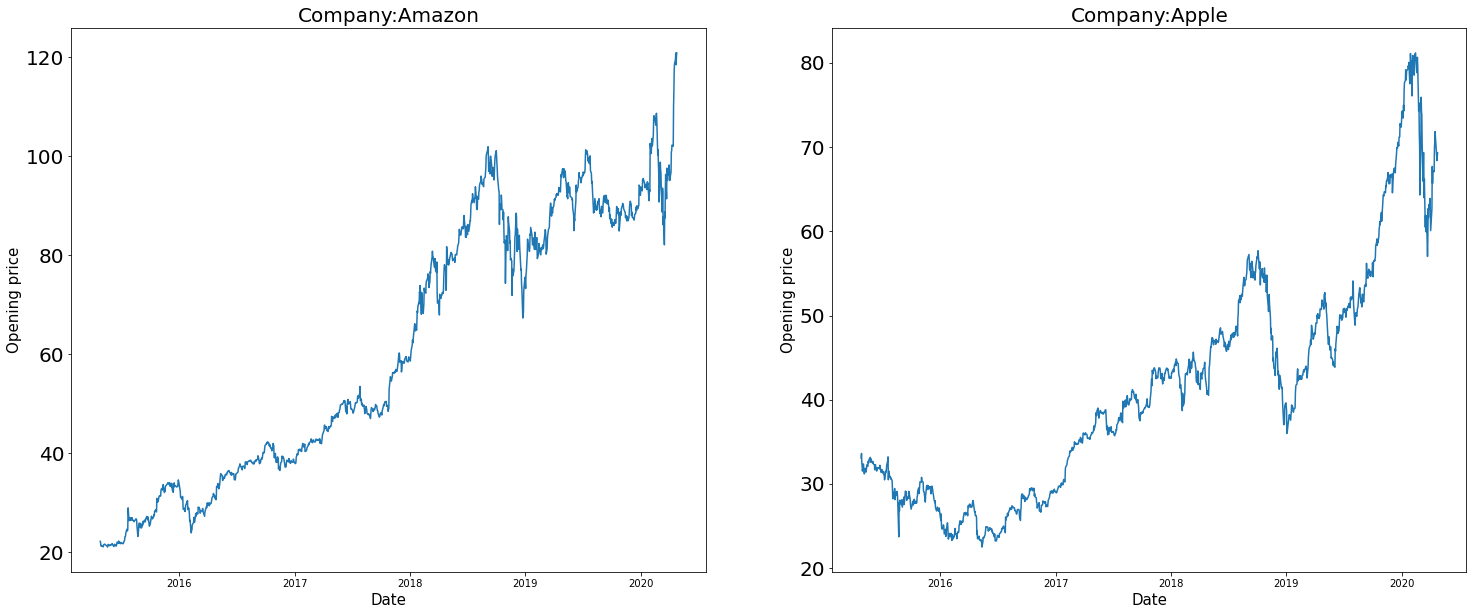

In [177]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)

plt.title('Company:Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df['Open']['AMZN'])

plt.subplot(1,2,2)

plt.title('Company:Apple', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df['Open']['AAPL'])

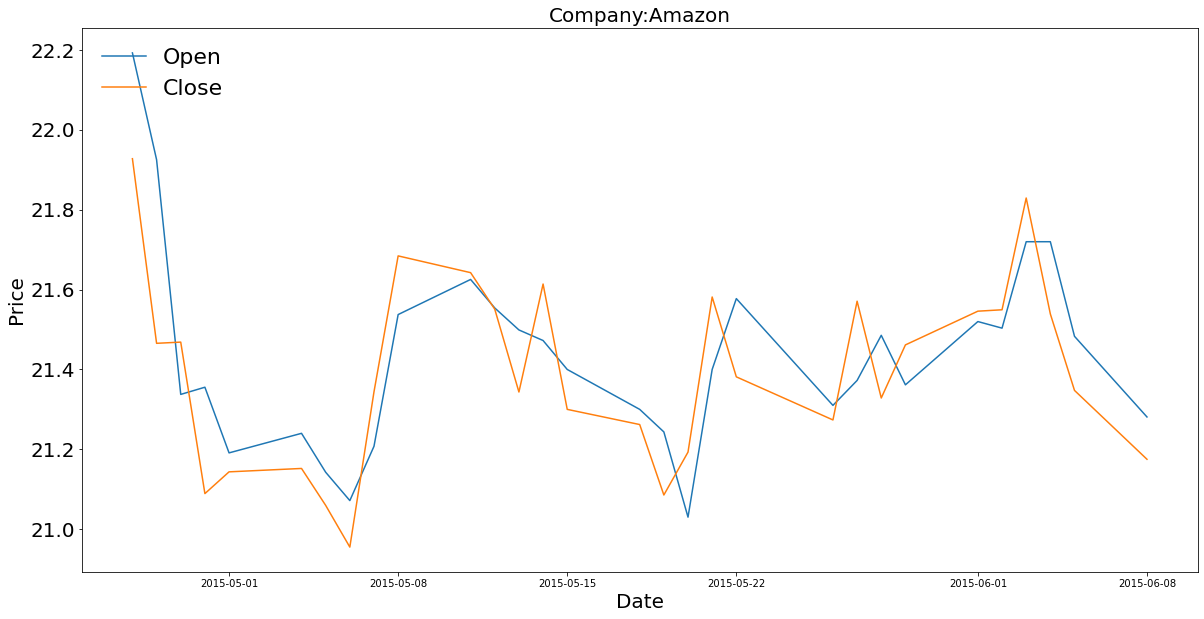

In [178]:
plt.figure(figsize=(20,10))

plt.title('Company:Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.plot(df.iloc[0:30]['Open']['AMZN'], label='Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'], label='Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size':22}) # Properties of legend box

There is an overall increase in 'Open' and 'Close' prices over the 30-day time period which shows the company in a positive direction.

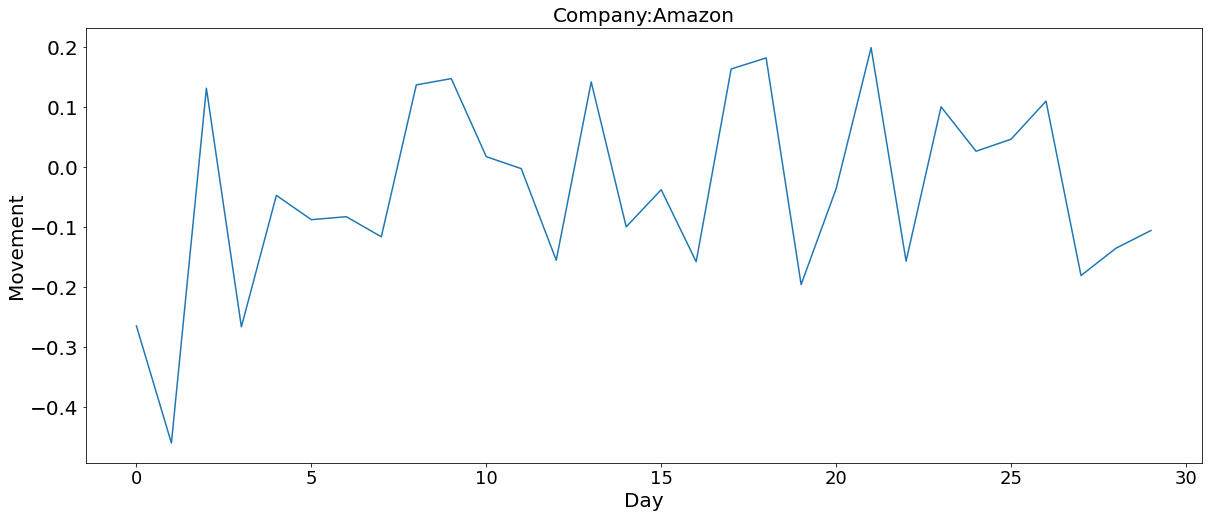

In [179]:
# 'Movement' is difference of closing and opening prices of a particular day.

plt.figure(figsize=(20,8))
plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Movement',fontsize=20)
plt.plot(movements[1][0:30])

A positive 'movement' is desirable which suggests the price has increased during the day

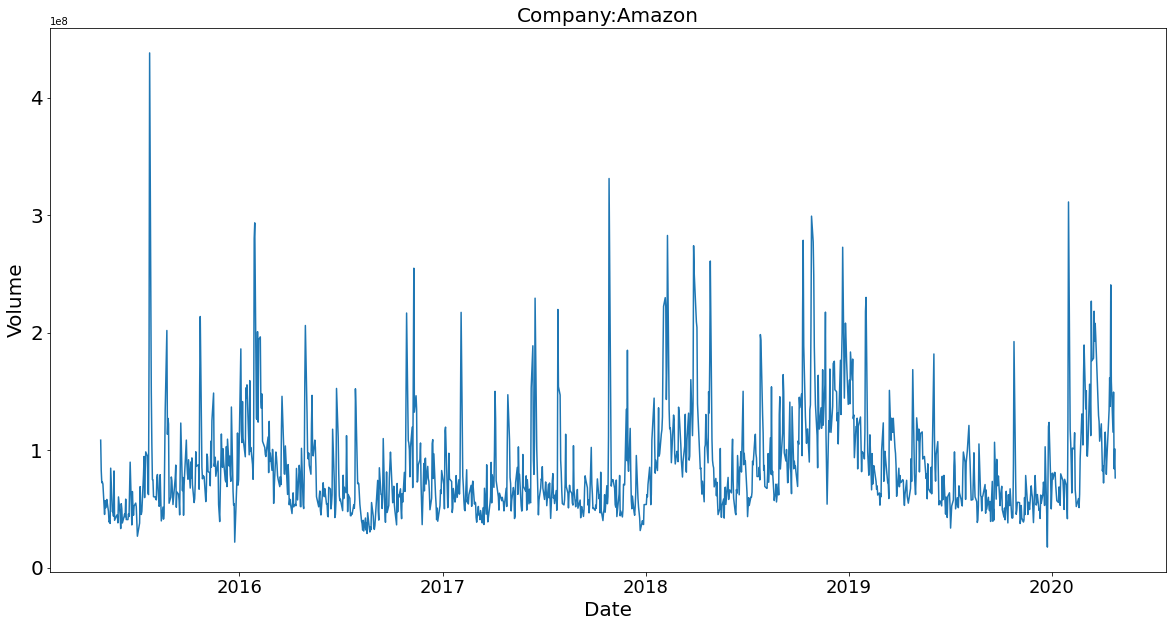

In [180]:
# The 'Volume' of stocks traded is plotted below

plt.figure(figsize=(20,10))
plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.plot(df['Volume']['AMZN'],label='Open')

The peaks suggest there are high volumes of stocks traded on certain days. This may be due to several situations which may affect the image of the company positively or negatively.

### **Normalization**
Stock prices of Amazon and Apple have different scales. There is a significant difference in the rate of change of units in stock price of Amazon and Apple and in that case we need to normalise our data in order to have consistency in our data for further analysis.

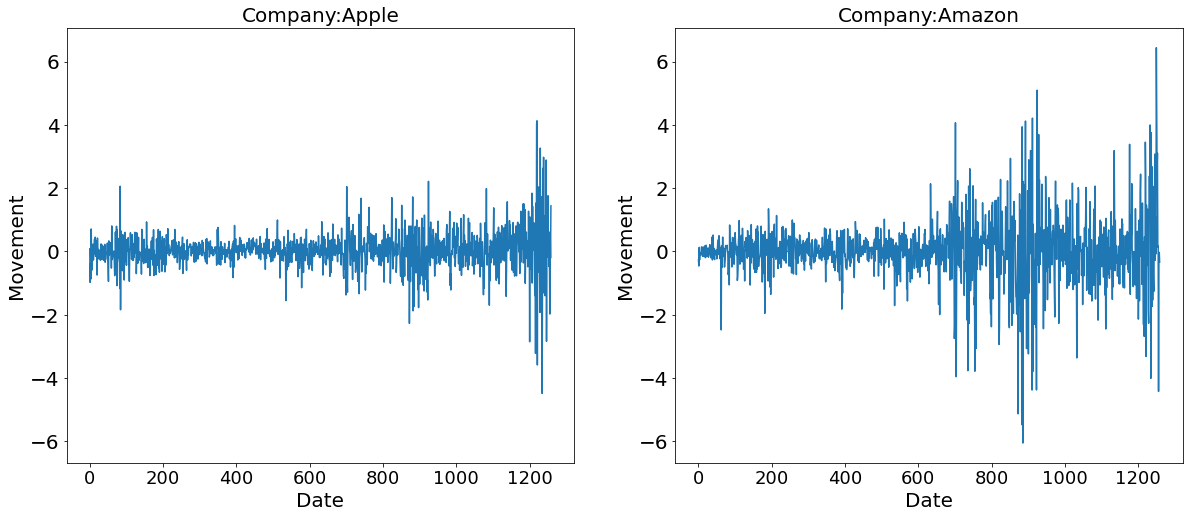

In [181]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(1,2,1)

plt.title('Company:Apple', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[0])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Company:Amazon', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[1])

In [182]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()  # Define a Normalizer
norm_movements = normalizer.fit_transform(movements)  # Fit and transform

In [183]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.33511277974477655
0.2655449656433241
-3.712296627436743e-05


All values are in range (-1,1)

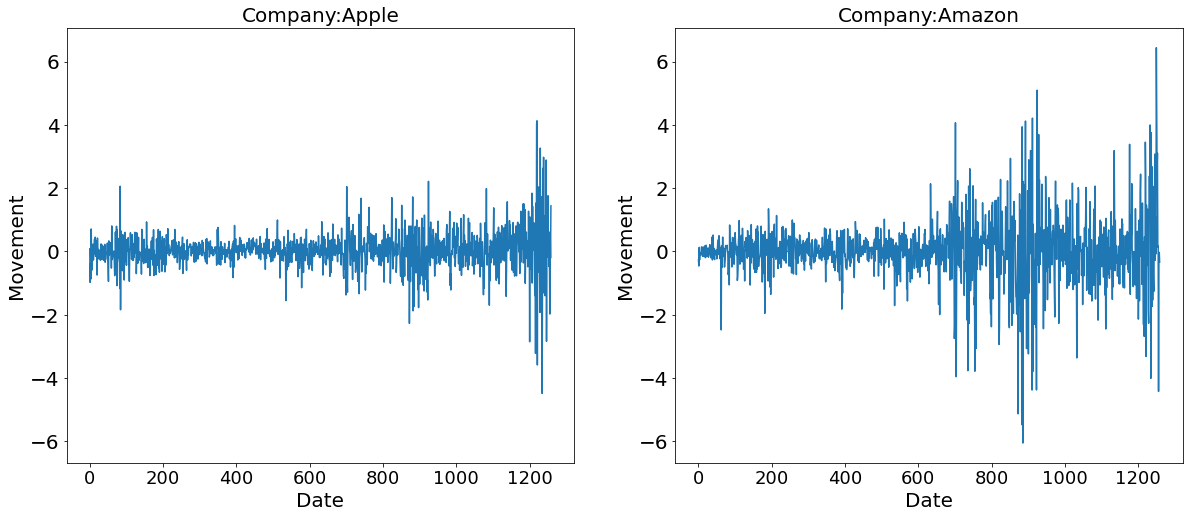

In [184]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(1,2,1)

plt.title('Company:Apple', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[0])

plt.subplot(1,2,2,sharey=ax1)
plt.title('Company:Amazon', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)
plt.plot(movements[1])

Now we have similar Normalized movements of Amazon and Apple

<br>

## CREATING A PIPELINE

In [185]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Initialize a normalizer
normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=1)

# Make a pipeline combining our normalizer and Kmeans model
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to daily stock movements created earlier
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [186]:
predictions

array([0, 0, 3, 4, 3, 1, 3, 3, 3, 3, 0, 2, 2, 4, 0, 3, 0, 4, 2, 3, 0, 1,
       3, 1])

### The Companies and their respective clusters are displayed below

In [187]:
df1 = pd.DataFrame({'Cluster':predictions,'companies':list(companies_dict)})

In [188]:
df1

,Cluster,companies
0,0,Amazon
1,0,Apple
2,3,Walgreen
3,4,Northrop Grumman
4,3,Boeing
5,1,Lockheed Martin
6,3,McDonalds
7,3,Intel
8,3,IBM
9,3,Texas Instruments


In [189]:
df1[df1['Cluster']==4]

,Cluster,companies
3,4,Northrop Grumman
13,4,American Express
17,4,Toyota


<br>

## Dimension Reduction-Principal Components(PCA)

In [190]:
norm_movements.shape

(24, 1259)

In [191]:
from sklearn.decomposition import PCA

# Initialize a normalizer
normalizer = Normalizer()

# Reduce the dimension
pca_data = PCA(n_components=2)

# Create Kmeans model
kmeans = KMeans(n_clusters=5, max_iter=1000)

# Make a pipeline combining normalizer, pca and kmeans
pipelines = make_pipeline(normalizer, pca_data, kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

# Prediction
predictions = pipeline.predict(movements)

# Create dataframe to store companies and predicted clusters
df2 = pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict.keys())}).sort_values(by=['Clusters'],axis = 0)

In [192]:
df1 = pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict)}).sort_values(by=['Clusters'],axis = 0)
df1

,Clusters,companies
0,0,Amazon
1,0,Apple
20,0,Chevron
16,0,Johnson & Johnson
14,0,Pepsi
10,0,MasterCard
21,1,Valero Energy
23,1,Bank of America
5,1,Lockheed Martin
12,2,General Electrics


<br>


## Plotting the Decision Boundary

<Figure size 432x288 with 0 Axes>

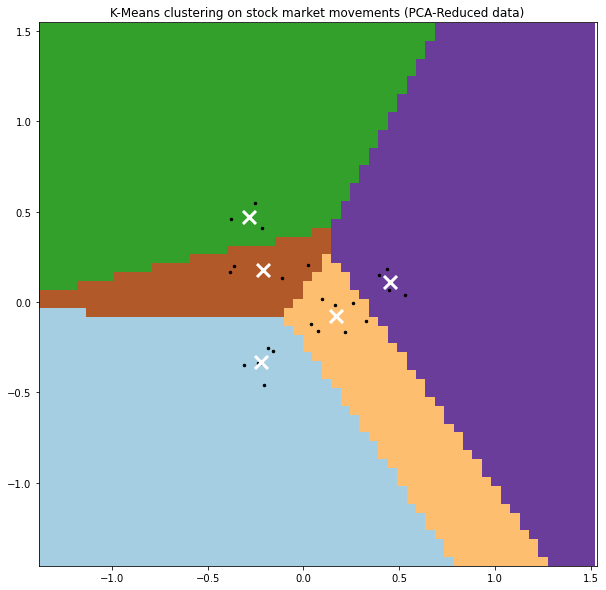

In [193]:
from sklearn.decomposition import PCA

# Reduce the data
pca_data = PCA(n_components=2).fit_transform(norm_movements)

# Define step size of mesh
h=0.05

# Plot the decision boundary
x_min, x_max = pca_data[:,0].min()-1, pca_data[:,0].max()+1
y_min, y_max = pca_data[:,1].min()-1, pca_data[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
kmeans.fit(pca_data)
kpredictions = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
kpredictions =  kpredictions.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(kpredictions,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()